# Analysis of the female and male proportions of OPS managers over the years

dataset info:

Title: OPS workforce demographics

Dataset Source: Ontario Data Catalogue

Dataset URL: https://data.ontario.ca/dataset/ops-workforce-demographics/resource/73a52425-92c0-440e-bad5-badd42edfbe9

Date Accessed: October 12, 2023

In [37]:
# Importing py libraries
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Processing dataset as a py dataframe
df = pd.read_csv('ops_workforce_demographic_dataset_-_2015_to_2023_english.csv', encoding='ISO-8859-1')

# dropping the first two rows so that column titles are at index 0
df.columns = df.iloc[1]
df = df.drop([0, 1]).reset_index(drop=True)

In [39]:
# Exploratory data analysis (EDA)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

1       Date FTE Allocation  FTE Actuals Variance # Student FTEs  \
0  31-Mar-15        65167.5      62932.8  -2234.7          511.1   
1  31-Mar-16        65592.5      63139.1  -2453.4          484.1   
2  31-Mar-17        66362.5      63881.8  -2480.7            555   
3  31-Mar-18        67161.8        66569   -592.8          653.6   
4  31-Mar-19        68084.2      65568.3  -2515.9          623.2   

1 # Intern FTEs # Seasonal FTEs # Pending LTIP and Salary Continuance FTEs  \
0         296.5           814.9                                      307.4   
1         286.3           866.7                                      274.5   
2           307           852.9                                        208   
3           371             929                                      245.5   
4           395             912                                      247.8   

1 Total Staff Strength FTEs (basis for remaining columns)  # Regular FTEs  \
0                                            

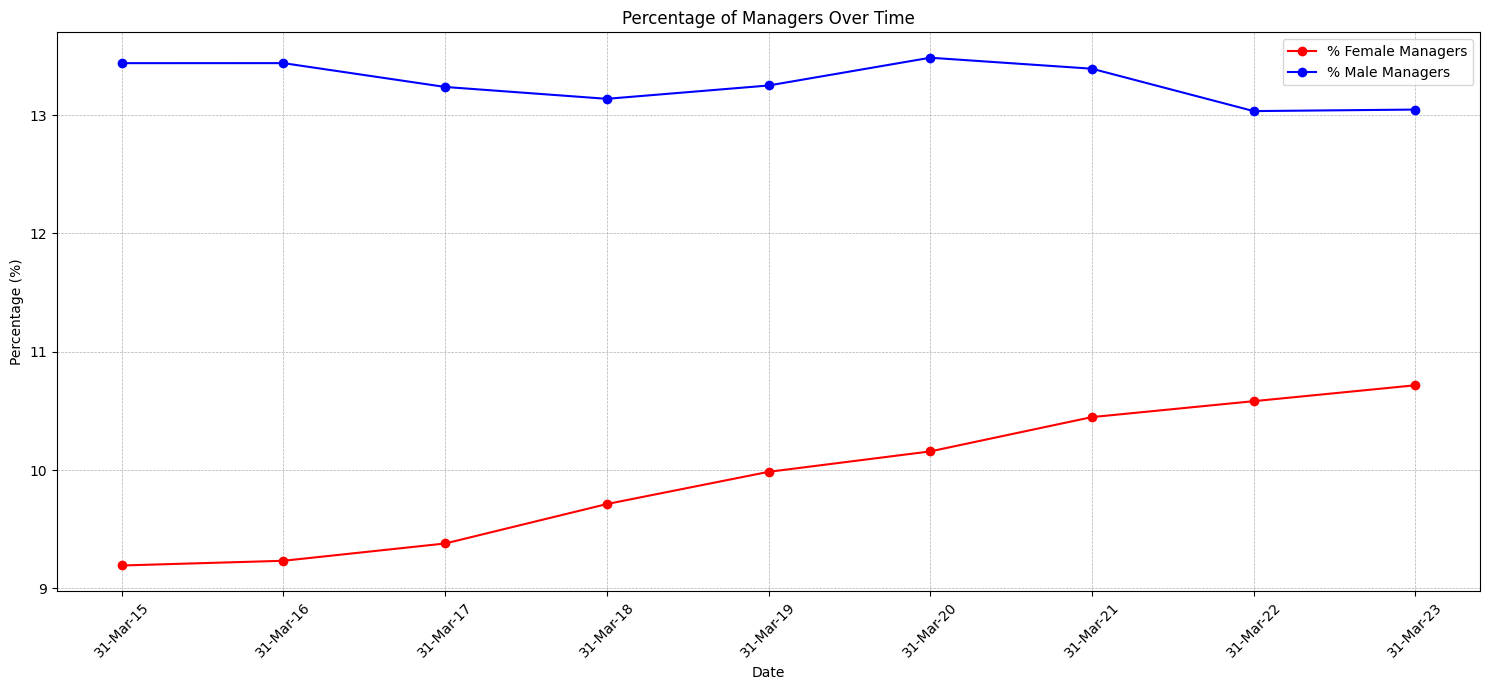

In [40]:
# Visualizing the proportions of OPS female and male managers over time as a percentage of total female FTE employees and total male FTE employees

# Convert necessary columns to float
df['Total # Female FTEs'] = df['Total # Female FTEs'].astype(float)
df['Total # Male FTEs'] = df['Total # Male FTEs'].astype(float)
df['# Female Manager FTEs'] = df['# Female Manager FTEs'].astype(float)
df['# Male Manager FTEs'] = df['# Male Manager FTEs'].astype(float)

# Calculate the percentage of female and male managers for each row
df['% Female Managers'] = (df['# Female Manager FTEs'] / df['Total # Female FTEs']) * 100
df['% Male Managers'] = (df['# Male Manager FTEs'] / df['Total # Male FTEs']) * 100

# Plotting
fig, ax = plt.subplots(figsize=(15, 7))

# Plotting the percentages for female and male managers over time
ax.plot(df['Date'], df['% Female Managers'], color='red', marker='o', label='% Female Managers')
ax.plot(df['Date'], df['% Male Managers'], color='blue', marker='o', label='% Male Managers')

# Setting labels and title
ax.set_title('Percentage of Managers Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Percentage (%)')
ax.set_xticks(df['Date'])
ax.set_xticklabels(df['Date'], rotation=45)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a legend
ax.legend()

plt.tight_layout()
plt.show()

